In [1]:
import sys
import random
import collections
import matplotlib.pyplot as plt

In [2]:
class Poisson:
    """
    泊松分布的仿真及可视化 https://www.luochang.ink/posts/poisson/
    """
    def __init__(self, rate=20, exp_num=100000, num_level=2):
        self.rate = int(rate)

        self.time = 1  # 单位时间

        self.EXP_NUM = exp_num  # 实验次数
        self.NUM_LEVEL = num_level  # 数量级

    def generator(self, prob):
        """仿真结果生成器"""
        while True:
            if random.random() < prob:
                yield 1
            else:
                yield 0

    def perform_exp(self, rate, time):
        """进行一次实验
        每次实验中，时间分片的数量比rate高两个数量级
        """
        level = len(str(rate))
        shard_num = 10 ** (level + self.NUM_LEVEL)  # 计算时间分片的数量

        gen = self.generator(rate / shard_num)

        cnt = 0
        for _ in range(time * shard_num):
            cnt += next(gen)

        return cnt

    def perform_exps(self, exp_num, rate, time):
        """多次实验，得到分布"""
        lst = []
        for _ in range(exp_num):
            lst.append(self.perform_exp(rate, time))

        return sorted(collections.Counter(lst).items(), key=lambda e: e[0])

    def draw(self, sorted_list):
        """画图"""
        s = sum([e[1] for e in sorted_list])
        x = [e[0] for e in sorted_list]
        y = [e[1] / s for e in sorted_list]

        plt.plot(x, y)

        plt.xlabel("k")
        plt.ylabel("P(k)")
        plt.show()

    def main(self):
        sorted_list = self.perform_exps(self.EXP_NUM, self.rate, self.time)
        self.draw(sorted_list)

    @staticmethod
    def calculator(rate, t, k):
        """用于计算泊松函数的概率 P(k|t,lambda)
           rate: lambda
           t: t
           k: k
        """
        import math
        return (rate * t) ** k / math.factorial(k) * math.exp(-rate * t)


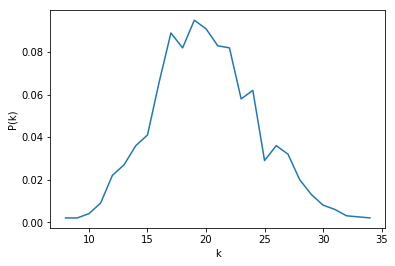

In [3]:
p = Poisson(exp_num=1000)
p.main()